In [1]:
import sys
sys.path.append("../bandfit")

import bandfit as bf
import matplotlib.pyplot as plt

## Import the Data

In [2]:
%ls ../data

Code.txt
SB_0.5_0.5_2.0_0.0_pc_1.0_pd_1.0.png
SB_1.0_1.0_0.75_0.0_pc_1.0_pd_1.0.png
SB_1.0_1.0_0.75_0.2_pc_1.0_pd_1.0.png
SB_1.0_1.0_0.75_0.4_pc_1.0_pd_1.0.png
SB_1.0_1.0_0.75_0.8_pc_1.0_pd_1.0.png
SB_1.3_1.3_0.4_0.2_pc_0.0_pd_1.0.png
SB_points_0.5_0.5_2.0_0.0_pc_1.0_pd_1.0.png
SB_points_1.0_1.0_0.75_0.0_pc_1.0_pd_1.0.png
SB_points_1.0_1.0_0.75_0.2_pc_1.0_pd_1.0.png
SB_points_1.0_1.0_0.75_0.4_pc_1.0_pd_1.0.png
SB_points_1.0_1.0_0.75_0.8_pc_1.0_pd_1.0.png
SB_points_1.3_1.3_0.4_0.2_pc_0.0_pd_1.0.png
t_t_0.5_c_2.0_d_0.0_pc_1.0_pd_1.0.txt
t_t_1.0_c_0.75_d_0.0_pc_1.0_pd_1.0.txt
t_t_1.0_c_0.75_d_0.2_pc_1.0_pd_1.0.txt
t_t_1.0_c_0.75_d_0.4_pc_1.0_pd_1.0.txt
t_t_1.0_c_0.75_d_0.8_pc_1.0_pd_1.0.txt
t_t_1.3_c_0.4_d_0.2_pc_0.0_pd_1.0.txt


In [3]:
data = bf.load_data("../data/t_t_0.5_c_2.0_d_0.0_pc_1.0_pd_1.0.txt")

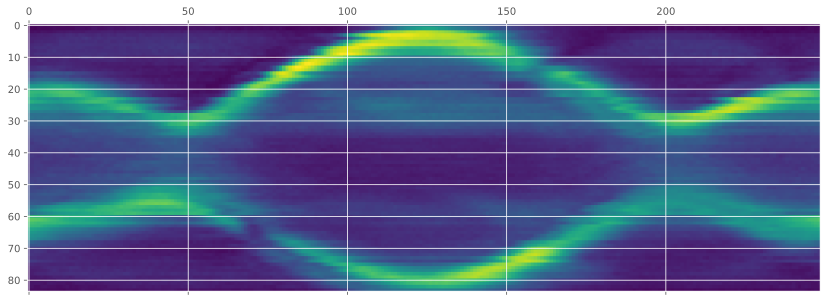

In [4]:
plt.matshow(data)

## Detect the Bands

In [5]:
bands = bf.detect_bands(data)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

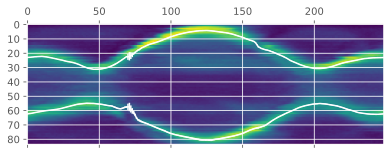

In [6]:
bf.plot_data_with_bands(data, bands)

## Fit the Theory Bands

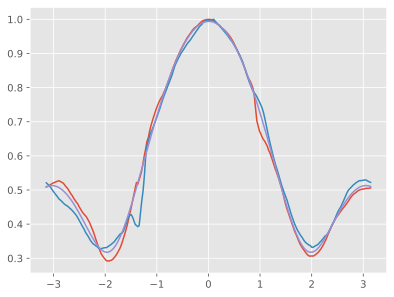

In [13]:
p, sigma = bf.fit_to_bands(bands,
                           c_d_order=1, 
                           ic_scan_steps=20,
                           debug_plots=True)

In [16]:
for name, val, unc in zip(["a", "b", "c", "d", "k_scale", "k_shift"], p, sigma):
    print(f"{name} = {val:.4f} +- {unc:.4f}")

a = 1.0000 +- 0.0060
b = 0.5136 +- 0.0113
c = -0.0659 +- 0.0089
d = 0.4029 +- 0.0039
k_scale = 1.0329 +- 0.0048
k_shift = -0.0087 +- 0.0027


(<Figure size 640x480 with 1 Axes>, <Axes: >)

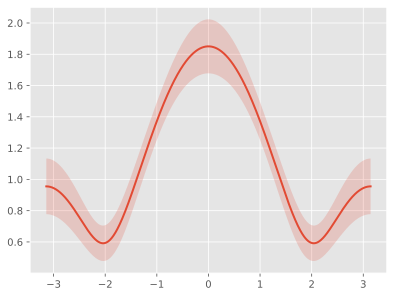

In [17]:
bf.plot_band_with_error_funnel(p[:4], sigma[:4])

## Constraining a, b to be closer to each other...

((1.0,
  0.9,
  -0.3184041488763748,
  0.3068125893496051,
  1.4453651848389524,
  0.0005592129046892522),
 array([0.01868871, 0.02834105, 0.01595615, 0.01343736, 0.00428216,
        0.00884451]))

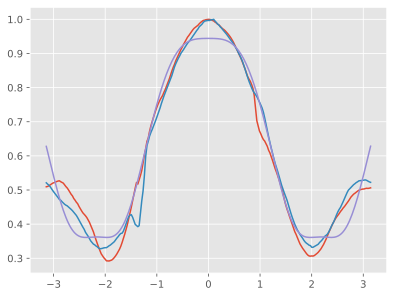

In [11]:
bf.fit_to_bands(bands,
                c_d_order=1, 
                debug_plots=True, 
                ic_scan_steps=20,
                bounds=[(-10, -10, 0.5, -0.1, 0.2, -0.5), (10, 10, 10, 0.1, 5, 0.5)])

This sucks!